In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

# A

In [8]:
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df["Price"] = housing.target
# print(df.isnull().sum())

# df.head()
df_numeric = df.select_dtypes(include="number")
df_numeric.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# B

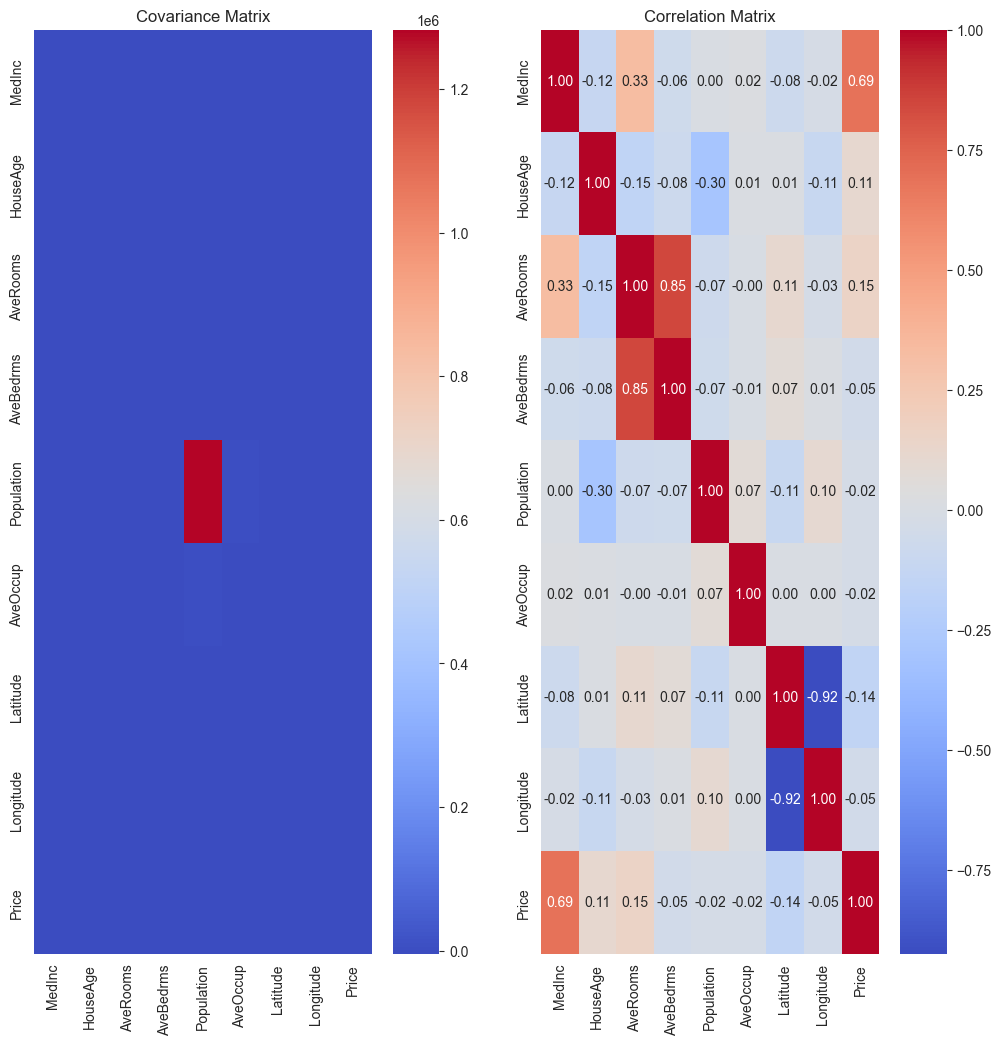

In [9]:
cov_matrix = df_numeric.cov()
cor_matrix = df_numeric.corr()
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
sns.heatmap(cov_matrix, annot=False, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Covariance Matrix")

sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Matrix")
plt.show()


# G

In [10]:
cor_with_price = cor_matrix["Price"].sort_values(ascending=False)
cor_with_price = cor_with_price.drop("Price")

strong_corr = cor_with_price[cor_with_price.abs() > 0.1]
strong_corr

MedInc      0.688075
AveRooms    0.151948
HouseAge    0.105623
Latitude   -0.144160
Name: Price, dtype: float64

# D

In [11]:
pairs = []
cols = df_numeric.columns

for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        c1, c2 = cols[i], cols[j]
        cov = cov_matrix.loc[c1, c2]
        cor = cor_matrix.loc[c1, c2]
        pairs.append((c1, c2, cov, cor))

pairs_sorted_by_cor = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)

pairs_sorted_by_cov = sorted(pairs, key=lambda x: abs(x[3]), reverse=True)

print("cov > cor:")
for (c1, c2, cov, corr) in pairs_sorted_by_cov:
    if abs(cov) > 2 and abs(corr) > 0:
        print(c1, c2, "cov=", cov, "corr=", corr)
        break

print("cor > cov")
for (c1, c2, cov, corr) in pairs_sorted_by_cor:
    if abs(cov) > 800 and abs(corr) < 0.1:
        print(c1, c2, "cov=", cov, "corr=", corr)
        break


cov > cor:
Latitude Longitude cov= -3.957053721340572 corr= -0.9246644339150366
cor > cov
Population AveOccup cov= 821.7120016336573 corr= 0.06986273036567692


In [ ]:
%%sql


In [12]:
# from google.colab import ai
# response = ai.generate_text("What is the capital of France?")
# print(response)